In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo Localização de Markov 1D

Text(0.5, 1.0, '$bel(x_0)$')

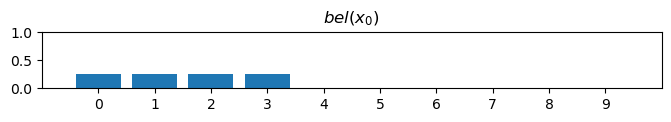

In [2]:
N = 10            # Número de células
x = np.arange(N)  # Será usado para a parte de visualização


# Criando o vetor para representar os estados
bel = np.zeros(N)

# Inicializando com distribuição uniforme entre as células 0 e 3
bel[0:4] = 0.25

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, bel)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$bel(x_0)$')

Text(0.5, 1.0, '$p(x_1 | u_1, x_0)$')

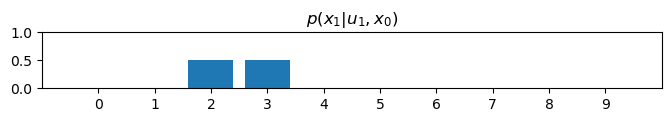

In [3]:
# Vetor para representar o modelo de transição
v_trans = np.zeros(N)
v_trans[2:4] = 0.5
#v_trans[2:5] = 1/3   # Para verificar o impacto da incerteza

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, v_trans)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$p(x_1 | u_1, x_0)$')

Text(0.5, 1.0, '$\\overline{bel}(x_1)$')

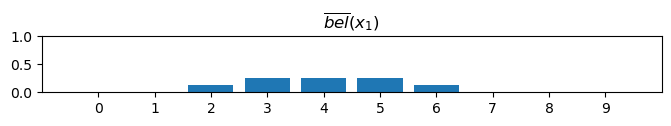

In [4]:
# Nova estimativa é obtida por uma convolução
bel_pred = np.convolve(bel, v_trans)[:N]   # Só preciso pegar o tamanho de bel

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, bel_pred)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$\\overline{bel}(x_1)$')

Text(0.5, 1.0, '$p(z_1 | x_1, M)$')

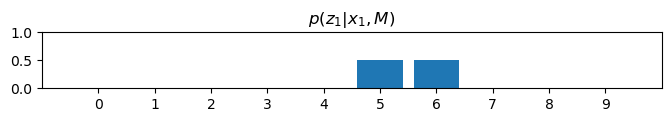

In [5]:
# Vetor para representar o modelo de observação
v_obs = np.zeros(N)
v_obs[5:7] = 0.5

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, v_obs)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$p(z_1 | x_1, M)$')

Text(0.5, 1.0, '$bel(x_1)$ - Normalizado')

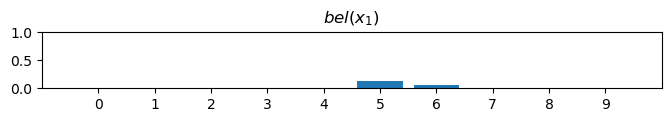

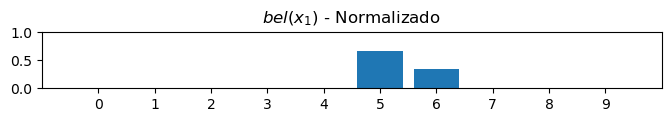

In [6]:
# Correção da predição
bel = v_obs * bel_pred

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, bel)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$bel(x_1)$')


# Normalizando bel
n = 1/np.sum(bel)
bel = n * bel

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.bar(x, bel)
ax.axis([-1, N, 0, 1])
ax.set_xticks(x)
ax.set_title('$bel(x_1)$ - Normalizado')

# Para praticar

- Fazer a localização considerando robôs com 2 e 3 DoF.
- Considerar modelos mais completos de ação e observação.